In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats
import scipy.stats as stats

%matplotlib inline
sns.set_palette("tab10")


In [2]:
hprice_df = pd.read_csv('house_price.csv')
hprice_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Bỏ các cột không cần thiết
cols_to_drop = ['Id']
hprice_df = hprice_df.drop(cols_to_drop, axis=1)

In [4]:
hprice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Phân tích mô tả

### 1. Phân tích tương quan các đặc trưng với `SalePrice`
- Phân tích sự tương quan của các biến đặc trưng (feature) với biến mục tiêu (target)

In [5]:
def thong_tin(ax, thongtin, height, k, name, color='b'):
    ax.axvline(thongtin, color=color, 
               linestyle='dashed', linewidth=0.5) # ax.axvline(vị trí đường, màu, kiểu dáng, độ dày)
    ax.text(thongtin, height*k, 
            f'{name}: {thongtin:.2f}', color=color,weight='bold') # ax.text(vị trí text, độ cao text, thông tin, màu, in đậm)

In [6]:
def phan_bo_chung(title, data):
    
    fig, ax = plt.subplots(figsize=(7,5))
    fplot = sns.histplot(data, kde=True, ax=ax)
    
    mode_ = stats.mode(data)
    mode_data = mode_[0]
    mode_loc = mode_[1]
    thong_tin(ax, mode_data, mode_loc, 8.02,'Mode', 'g')
    thong_tin(ax, np.min(data), mode_loc, 7.7,'Min', 'k')
    thong_tin(ax, np.max(data), mode_loc, 6.8,'Max', 'k')
    thong_tin(ax, np.median(data), mode_loc, 5.75,'Median', 'g')
    thong_tin(ax, np.mean(data), mode_loc, 4.7,'Mean', 'g')

    # Trang trí biểu đồ
    ax.set_title(f'Distribution of {title}', weight='bold',size=13, color='darkorange')
    ax.set_xlabel(title, color='navy')
    ax.set_ylabel('Count', color='navy')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('navy')
    ax.spines['bottom'].set_color('navy')
    ax.tick_params(axis='both', colors='navy')
    
    plt.grid(alpha = 0.5)
    plt.show()

### 2. Phân tích tương quan các đặc trưng với `SalePrice`
- Phân tích sự tương quan của các biến đặc trưng (feature) với biến mục tiêu (target)

#### Đặc trưng có giá trị kiểu số (numeric variable)

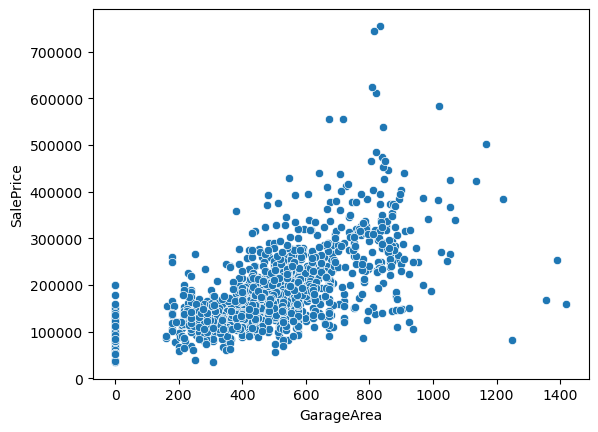

In [7]:
sns.scatterplot(x='GarageArea', y='SalePrice', data=hprice_df);

#### Đặc trưng có giá trị kiệu loại (categorical feature)
- Dùng box plot để vẽ biểu đồ biểu thị tương quan giữa 2 biến: 1 biến có giá trị liên tục, 1 biến là kiểu loại

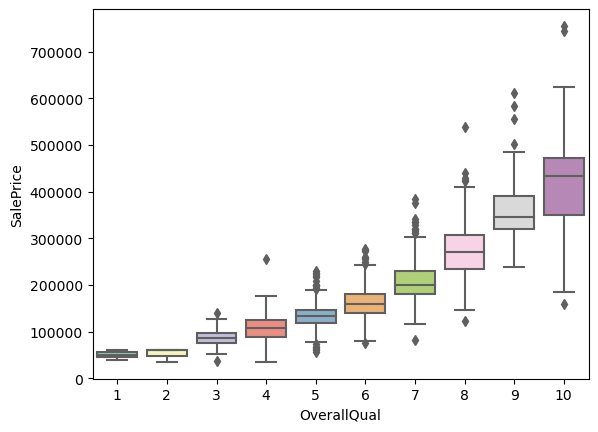

In [8]:
sns.boxplot(x='OverallQual', y='SalePrice', data=hprice_df, palette="Set3");

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

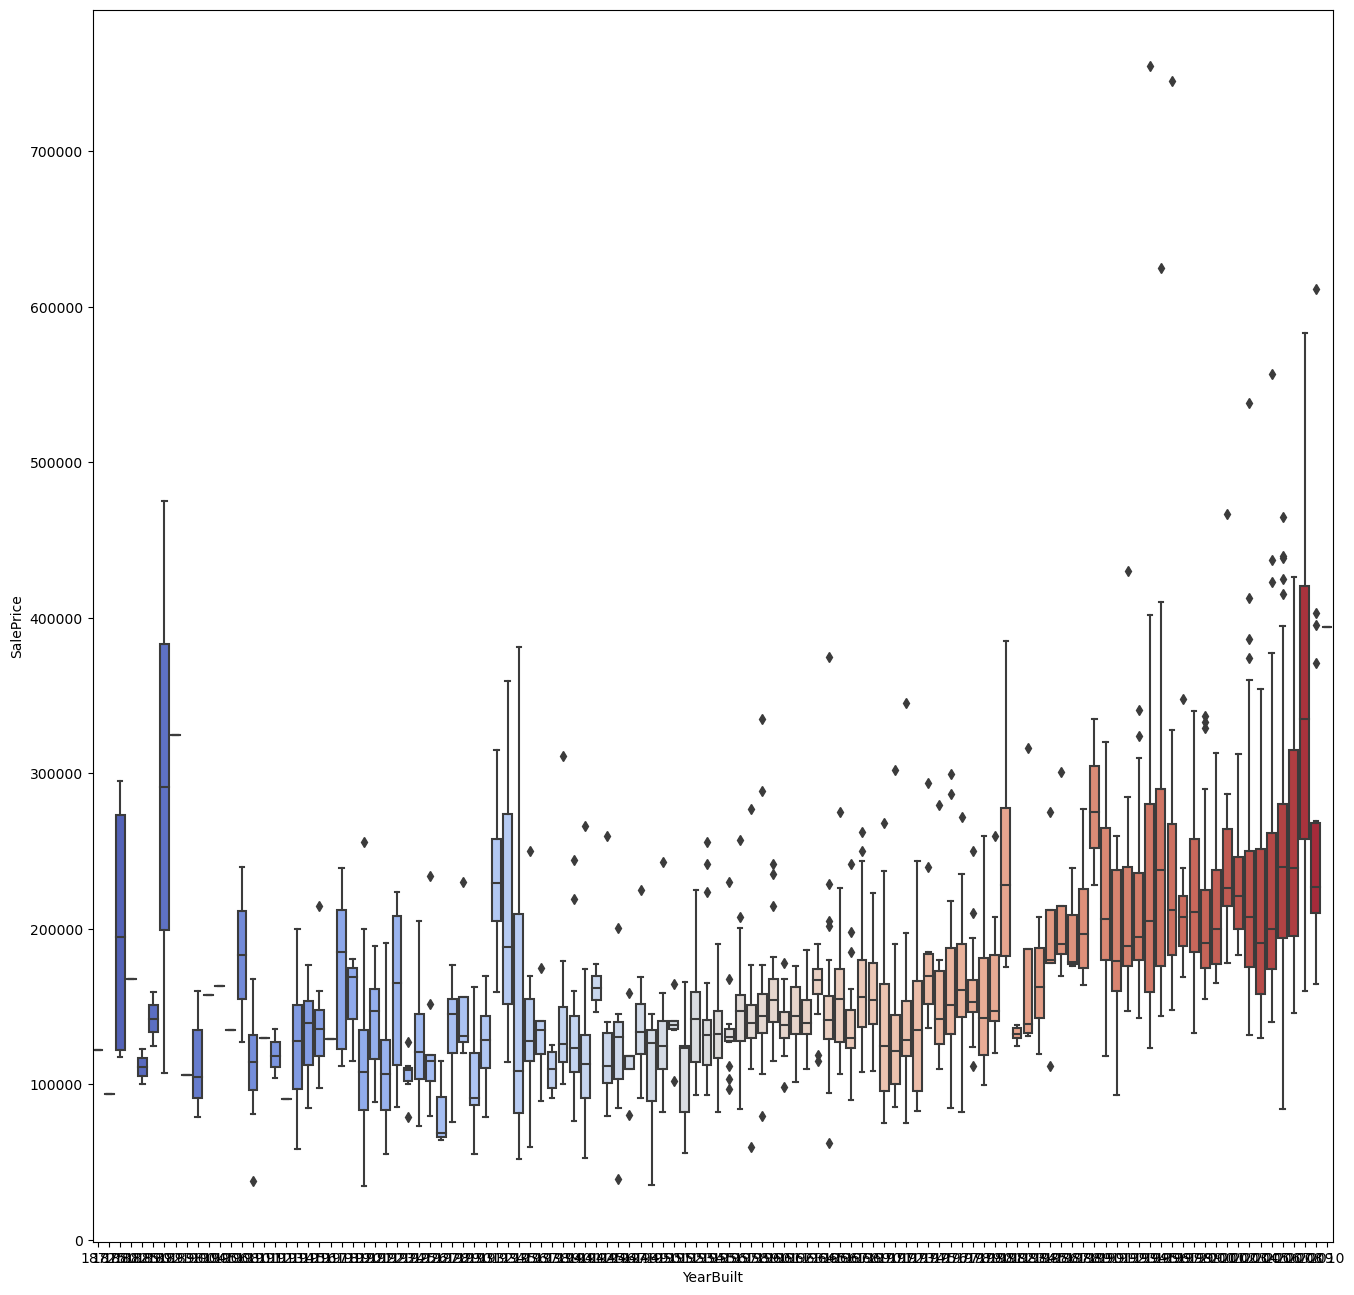

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(16, 16))
sns.boxplot(x='YearBuilt', y='SalePrice', data=hprice_df, ax=ax, palette="coolwarm")


#### Heatmap

In [10]:
corr_mat = hprice_df.corr(numeric_only=True)
corr_mat.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856


**Zoom biểu đồ heatmap**

In [11]:
k = 10 #number of variables for heatmap
# 37 cột (tổng các biến đầu vào), 10 hàng (các biến đầu vào có corr cao nhất với Sale Price)
n_largs = corr_mat.nlargest(k, 'SalePrice')
n_largs

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,-0.011378,...,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
GrLivArea,0.074853,0.402797,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,-0.009640,...,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
GarageCars,-0.040110,0.285691,0.154871,0.600671,-0.185758,0.537850,0.420622,0.364204,0.224054,-0.038264,...,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409
GarageArea,-0.098672,0.344997,0.180403,0.562022,-0.151521,0.478954,0.371600,0.373066,0.296970,-0.018227,...,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.623431
TotalBsmtSF,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,0.522396,0.104810,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,-0.251758,0.457181,0.299475,0.476224,-0.144203,0.281986,0.240379,0.344501,0.445863,0.097117,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852
FullBath,0.131608,0.198769,0.126031,0.550600,-0.194149,0.468271,0.439046,0.276833,0.058543,-0.076444,...,0.187703,0.259977,-0.115093,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.019669,0.560664
TotRmsAbvGrd,0.040380,0.352096,0.190015,0.427452,-0.057583,0.095589,0.191740,0.280682,0.044316,-0.035227,...,0.165984,0.234192,0.004151,-0.006683,0.059383,0.083757,0.024763,0.036907,-0.034516,0.533723
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897


**Pairplot**

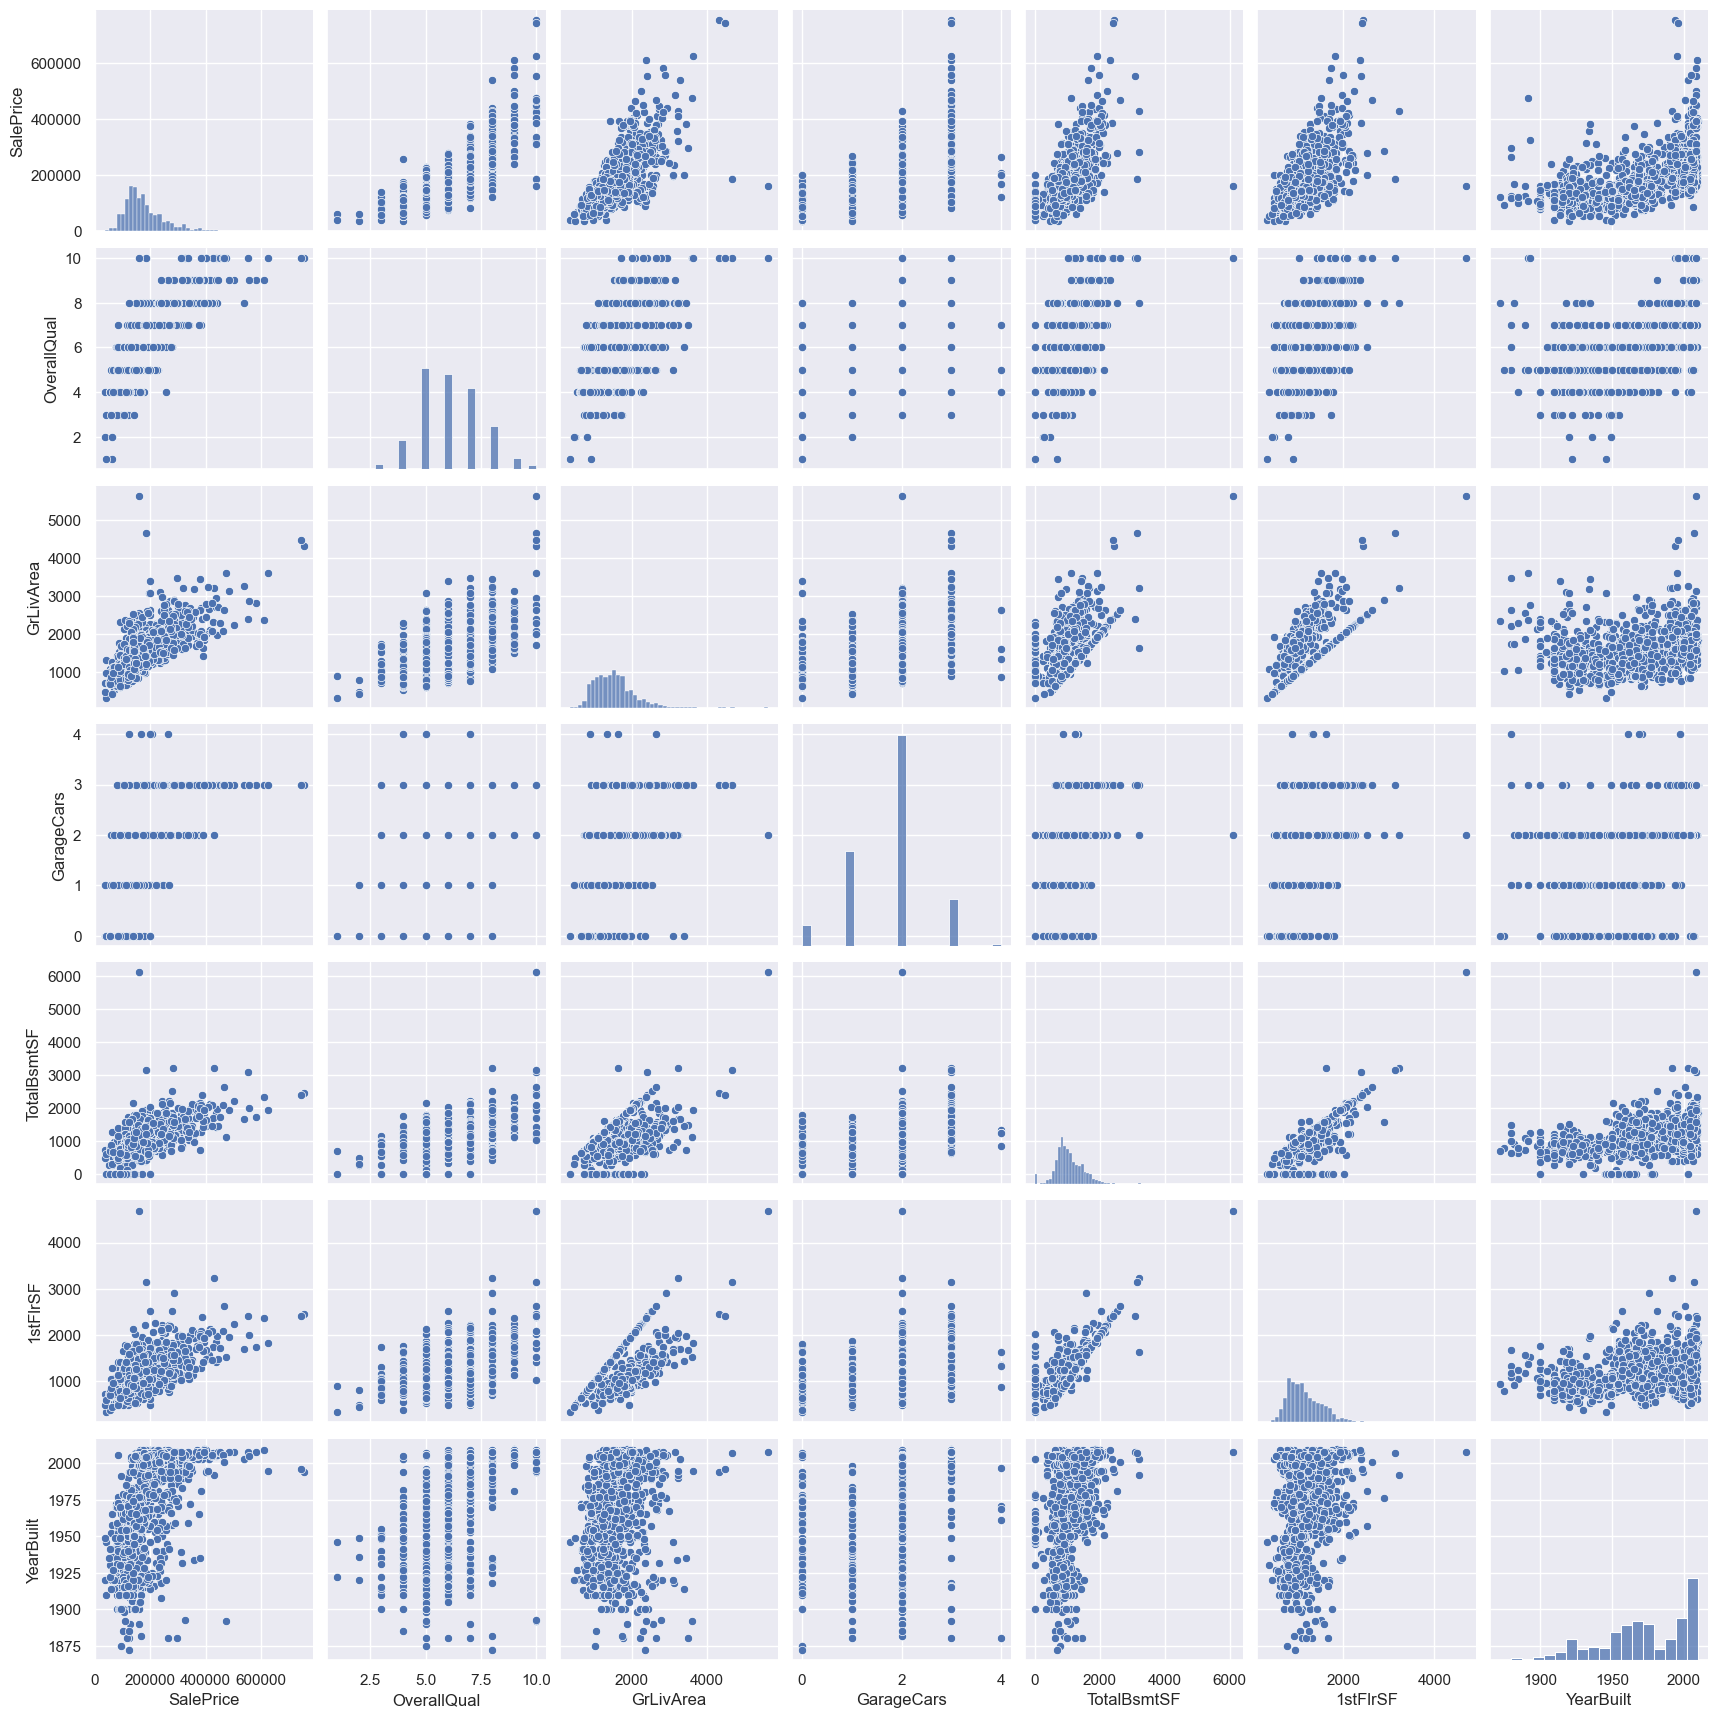

In [12]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt']
sns.pairplot(hprice_df[cols])
plt.show()

### Xử lý dữ liệu thiếu

#### Nhóm Bsmt

#### Nhóm garage - TODO

#### Các cột còn lại - TODO

In [13]:
# Tổng kết:

#### Kiểm tra lại

In [14]:
# double check
hprice_df.columns[hprice_df.isna().sum() > 0]

## Output đúng: Index([], dtype='object')

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

### Tiền xử lý và chuẩn hóa dữ liệu

In [15]:
from scipy.stats import norm, skew
from scipy import stats

##### SalePrice
- Biểu đồ phần phân bố SalePrice cho thấy, phân bố lệch về bên phải. Tuy nhiên, linear regession (cũng như các model tuyến tính) làm việc tốt hơn trên phân bố chuẩn --> cần biến đổi (transform) SalePrice về phân phối chuẩn.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9684\3984095501.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fplot = sns.distplot(hprice_df['SalePrice'], kde=True, fit=norm);


Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


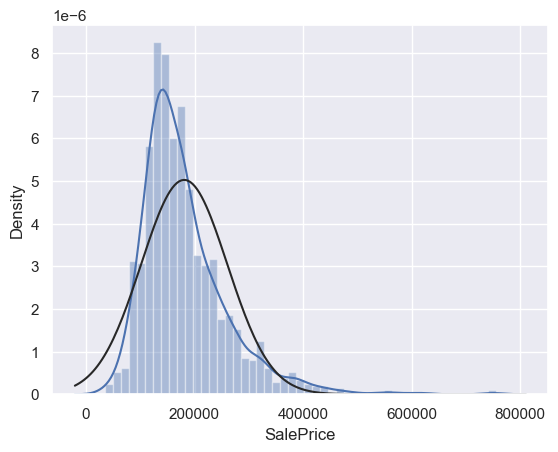

In [16]:
fplot = sns.distplot(hprice_df['SalePrice'], kde=True, fit=norm);
print('Skewness:', hprice_df['SalePrice'].skew());
print('Kurtosis:', hprice_df['SalePrice'].kurtosis());

In [17]:
np.std(hprice_df['SalePrice'])

79415.29188606751

##### Skewness các cột còn lại
-- TODO

### LabelEncode và OneHotEncoding

![1hot](1hot.jpg)